In [1]:
import pandas as pd
import numpy as np

In [2]:
airlines = pd.read_excel("D:\ExcelR_Classes_Data\Assignments\Data_Science\Assignment - 07 (Clustering)\EastWestAirlines.xlsx", sheet_name='data')

In [3]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines.shape

(3999, 12)

In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
airlines.duplicated().sum()

0

In [8]:
airlines = airlines.drop(['ID#'], axis = 1)

In [9]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
minmaxscaler = MinMaxScaler()

In [12]:
norm_airlines = minmaxscaler.fit_transform(airlines)

In [13]:
norm_airlines

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

## Dendrogram

In [14]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

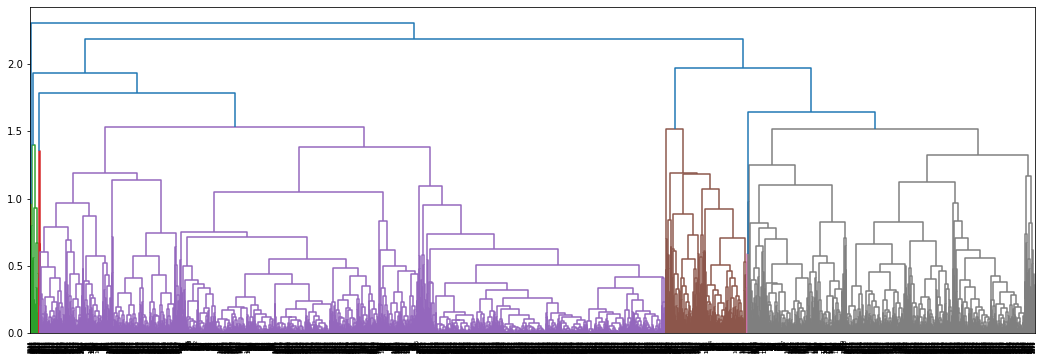

In [15]:
plt.figure(figsize = (18, 6))
#dendrogram = sch.dendrogram(sch.linkage(norm_airlines, method = 'complete'))
#above lne commented coz it take too much time to execute

## Hirarchical Clustering (Agglomerative Clustering)

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
norm_airlines_clust = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [18]:
norm_airlines_clust

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [19]:
y_norm_airlines_clust = norm_airlines_clust.fit_predict(norm_airlines)

In [20]:
y_norm_airlines_clust

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [21]:
airlines['H_Clust'] = y_norm_airlines_clust

In [22]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


## K-Means

In [23]:
from sklearn.cluster import KMeans

In [25]:
#elobow curv to determine to number of cluster

temp = []
for i in range (1, 11):
    var = KMeans(n_clusters = i, random_state = 0)
    var.fit(norm_airlines)
    temp.append(var.inertia_)

Text(0, 0.5, 'within cluster sum of sqr distance')

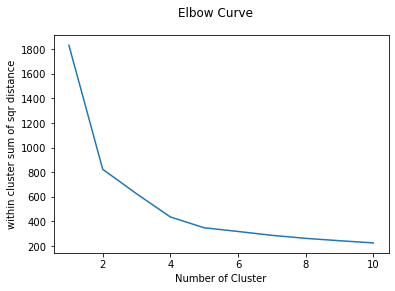

In [26]:
plt.plot(range(1, 11), temp)
plt.suptitle("Elbow Curve")
plt.xlabel("Number of Cluster")
plt.ylabel("within cluster sum of sqr distance")


In [28]:
model_final = KMeans(n_clusters = 5)

In [29]:
model_final.fit(norm_airlines)

KMeans(n_clusters=5)

In [30]:
model_final.labels_

array([4, 4, 4, ..., 3, 2, 2])

In [31]:
## converting array into series

xxx = pd.Series(model_final.labels_)

In [32]:
xxx

0       4
1       4
2       4
3       4
4       3
       ..
3994    1
3995    1
3996    3
3997    2
3998    2
Length: 3999, dtype: int32

In [33]:
airlines['KMeans'] = xxx

In [34]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clust,KMeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3


## DBScan

In [38]:
from sklearn.cluster import DBSCAN

In [41]:
airlines.values

array([[28143,     0,     1, ...,     0,     0,     4],
       [19244,     0,     1, ...,     0,     0,     4],
       [41354,     0,     1, ...,     0,     0,     4],
       ...,
       [73597,     0,     3, ...,     1,     2,     3],
       [54899,     0,     1, ...,     0,     0,     2],
       [ 3016,     0,     1, ...,     0,     0,     2]], dtype=int64)

In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
stdscaler = StandardScaler().fit(airlines.values)

In [45]:
arr = stdscaler.transform(airlines.values)

In [46]:
arr

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.32211506e-01,  1.36050435e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.32211506e-01,  1.36050435e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.32211506e-01,  1.36050435e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00,  1.49873235e+00,  6.21585851e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.32211506e-01, -1.17332644e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -7.32211506e-01, -1.17332644e-01]])

In [48]:
dbscan = DBSCAN(eps = 3, min_samples = 12)

In [50]:
dbscan.fit(arr)

DBSCAN(eps=3, min_samples=12)

In [54]:
a = dbscan.labels_

In [55]:
a

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
cluster = pd.DataFrame(a, columns=['DBScan'])

In [57]:
cluster.head()

,DBScan
0,0
1,0
2,0
3,0
4,0


In [58]:
final = pd.concat([airlines, cluster], axis = 1)

In [59]:
final.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clust,KMeans,DBScan
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,0


## Silhouette Score (DBScan)

In [60]:
from sklearn.metrics import silhouette_score

In [61]:
accuracy = silhouette_score(arr, a)

In [62]:
accuracy

0.47723976204035956